# Perceptron and proof of mistake bound

Based on [Geoff Gordon's Perceptron lecture notes](https://qna.cs.cmu.edu/#/pages/view/166) 

Learning Objectives of this lecture:
- understand the perceptron algorithm, how to implement it
- understand how the weight vector changes during training
- understand the concept of margin and mistake bound as well as the proof for the perceptron mistake bound

### Linear discriminant

We have seen the equation of a linear boundary in 10-606. 

Given a point $(x_1,x_2)\in \mathbb{ℝ}^2$, the linear discriminant predicts that it is positive if
$$w_1x_1+w_2x_2+w_0>0$$

For convenience, we write:
$w = \left(\begin{array}{r} w_0 \\ w_1 \\ w_2 \end{array}\right)$
and $x = \left(\begin{array}{r} 1 \\ x_1 \\ x_2 \end{array}\right)$

The classification rule is to predict positive when
$w\cdot x > 0\,$.

This example is in two dimensions, but in general for any number of diemsnions, we consider the hyperplane defined by $w\cdot x = 0\,$, which divides the space into two half-spaces corresponding to the two labels. If $w\cdot x > 0\,$ we predict positive.


Matplotlib is building the font cache; this may take a moment.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing more than one positional argument to axis() is deprecated and will raise a TypeError two minor releases later.


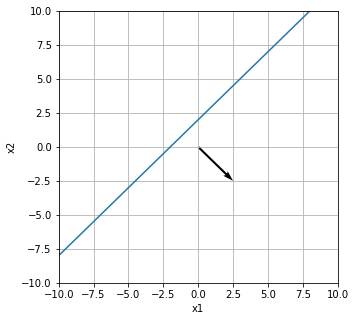

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


x1 = np.linspace(-10,10,1000)

w = [2.5,-2.5]
b = 5

x2_plot = (-b - w[0]*x1)/w[1]

plt.figure(figsize=(5,5))
plt.plot(x1,x2_plot)
origin = [0], [0]
plt.quiver(*origin, w[0],w[1], color='k',angles='xy', scale_units='xy', scale=1)
plt.axis([-10,10,-10,10],'equal')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()



### Streaming data

We observe a sequence of data points $x^t\in \mathbb{R}^2$ one at a time. After each point, we predict a label $\hat \ell\in {−1,+1}$; then we get to see the true label $\ell_t$ before we need to predict the next point.

### (Online) Perceptron algorithm

- Start with $w_1$ set to a zero vector
- For each incoming point:
    - if $w_t\cdot x_t>0$ predict positive
    - if there is a mistake:
        - if the correct label was `+`, set $w_{t+1} = w_t + x_t$
        - if the correct label was `-`, set $w_{t+1} = w_t - x_t$
    - If no mistake, set $w_{t+1} = w_t$



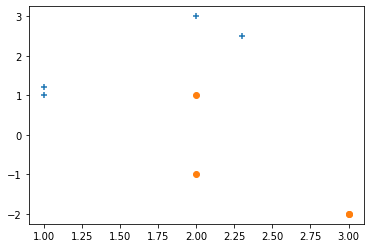

In [5]:
x = np.array([[1,1], [1,1.2], [3,-2], [2,1],[2,3],[3,-2], [2,-1],[2.3,2.5]])
y = np.array([1,1,-1,-1,1,-1,-1,1])

plt.scatter(x[y==1,0],x[y==1,1], marker='+')
plt.scatter(x[y==-1,0],x[y==-1,1], marker='o')



/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


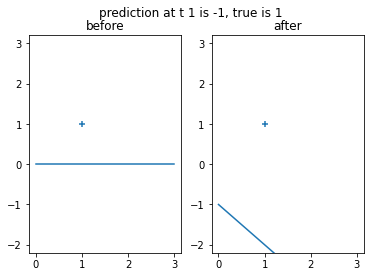

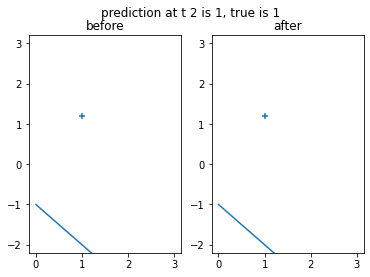

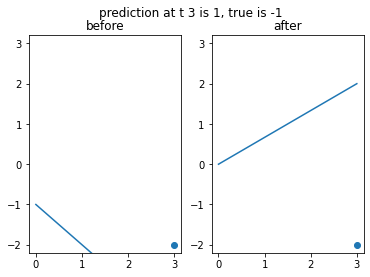

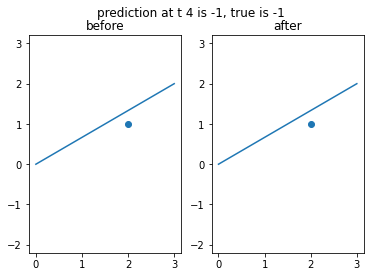

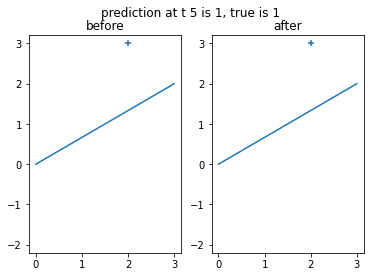

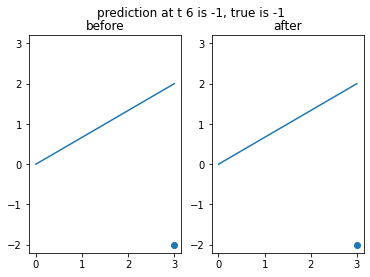

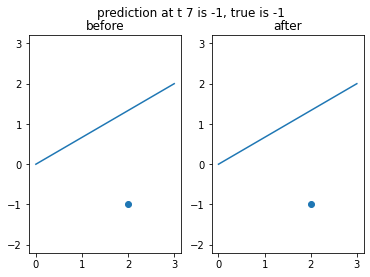

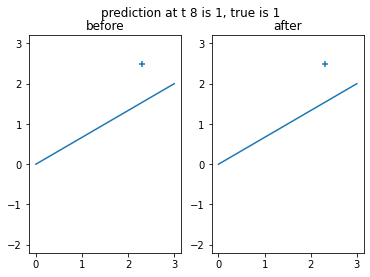

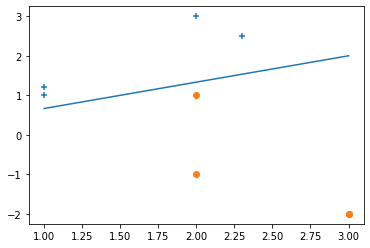

In [7]:
w = np.zeros(3)

def draw_line(low,high,w,ax):
    x1 = np.linspace(low,high,1000)
    x2_plot = np.nan_to_num((-w[0] - w[1]*x1)/w[2])
    line = ax.plot(x1,x2_plot)
    return line


# for t in range(len(y)):
#     x_t = np.array([1,x[t,0],x[t,1]])
#     pred = 2*(x_t.dot(w)>0)-1
#     if y[t]*pred<0: #wrong classification
#         w = w + y[t]*x_t


for t in range(len(y)):
    fig = plt.figure()
    x_t = np.array([1,x[t,0],x[t,1]])
    pred = 2*(x_t.dot(w)>0)-1
    ax = fig.add_subplot(1,2,1)
    if y[t]==1:
        ax.scatter(x[t,0],x[t,1], marker='+')
    else:
        ax.scatter(x[t,0],x[t,1], marker='o')
    l1 = draw_line(0,3,w,ax)
    ax.set_title('before')
    if y[t]*pred<0: #wrong classification
        w = w + y[t]*x_t
    ax.set_ylim([-2.2,3.2])
    ax = fig.add_subplot(1,2,2)
    if y[t]==1:
        ax.scatter(x[t,0],x[t,1], marker='+')
    else:
        ax.scatter(x[t,0],x[t,1], marker='o')
    l2 = draw_line(0,3,w,ax)
    ax.set_title('after')
    ax.set_ylim([-2.2,3.2])
    fig.suptitle('prediction at t {} is {}, true is {}'.format(t+1, 2*(pred>0)-1,y[t]))
    
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x[y==1,0],x[y==1,1], marker='+')
ax.scatter(x[y==-1,0],x[y==-1,1], marker='o')
l2 = draw_line(1,3,w,ax)



What happens each time we make a mistake? We update the parameters so that the predictions is pushed towards the correct class (i.e. it becomes more positive if the example is positive and more negative if the example is negative).

Consider we  make a mistake for $x_t$ which is a positive example. Then consider what the prediction of the algorithm after the update becomes:

$$w_{t+1}\cdot x_t = (w_t+x_t)\cdot x_t = w_t\cdot x_t + ||x_t||^2$$

Recall that the first element of $x_t$ is always equal to 1, so $||x_t||^2\ge 1 > 0$, and

$$w_{t+1}\cdot x_t = w_t\cdot x_t + ||x_t||^2 \ge w_t\cdot x_t $$

i.e. weights are changed to make the dot product more positive.

If $x_t$ was a negative example and we make a mistake:

$$w_{t+1}\cdot x_t = (w_t-x_t)\cdot x_t = w_t\cdot x_t - ||x_t||^2 < w_t\cdot x_t  $$

i.e. weights are changed to make the dot product more negative.

The update rules therefore push the algorithm to correctly classify each misclassified example.


### Mistake bound

The perceptron algorithm has a very nice property related to the number of mistakes it will make. This property works given the following assumptions:

- the data is perfectly separable. We call an optimal parameter vector that can correctly classify the data $w^*$.
- $w^*\cdot x_t > \epsilon$ for all positive examples and $w^*\cdot x_t < - \epsilon$ for all negative examples. Notice this is an inequality. We are saying that there is a positive $\epsilon>0$
- the norm of all $x_t$ is bounded, i.e. there is a constant $U$ such that $x_t\le U$ for al $t$.

If these conditions are satisfied, then the perceptron algorithm will make at most $\frac{U^2||w^*||^2}{\epsilon^2}$ mistakes in total.

This is a very nice property! We are saying that the number of datapoints, or the order they are presented in, do not affect the maximum number of mistakes!

#### Proof

Through training, $w_t$ becomes more aligned with $w^*$, and we can measures this throught the dot product $w_t\cdot w^*$, which is associated with the number of mistakes. 


In fact, the alignment starts at 0, and then with each misclassified example, it increases by at least epsilon. Therefore, the alignment after $M$ mistakes is going to be greater than $M\epsilon$. We can prove this by induction:

- Base case: 0 mistakes, $w_0\cdot w^* = 0 \ge 0\epsilon$
- Assume true for M mistakes, i.e. $w_t\cdot w^*  \ge M\epsilon$
- At mistake M+1:
    - if $y_t$ is positive $w_{t+1}\cdot w^* = w_t\cdot w^* + x_t\cdot w^* =  w_t\cdot w^* +\epsilon \ge (M+1)\epsilon$
    - if $y_t$ is negative $w_{t+1}\cdot w^* = w_t\cdot w^* - x_t\cdot w^* =  w_t\cdot w^* +\epsilon \ge (M+1)\epsilon$
    
Therefore we have proven $w_t\cdot w^*  \ge M\epsilon$. 

**First step done**. This expression is already bounding the total number of mistakes, but we still need to show that $w_t\cdot w^*$ is bounded, making $M$ be relatively small.


Notice that $w_t$ starts at $0$, and only increases by $x_t$ at each step $t$ where there is a mistake.  We can also show this induction that  $w_t\cdot w_t  \le M U^2$:

- Base case: 0 mistakes, $||w_0||^2 = 0 \le 0U$
- Assume true for M mistakes, i.e. $||w_t||^2 \le MU^2$
- At mistake M+1:
    - if $y_t$ is positive $||w_{t+1}||^2 = w_{t+1}\cdot w_{t+1} = (w_{t} + x_t) \cdot (w_{t} + x_t) = ||w_t||^2 + 2w_{t}\cdot x_t + ||x_t||^2 \le ||w_t||^2 + U^2 = MU^2$ (recall that this positive example is misclassified and that means that $w_{t}\cdot x_t\le0$).
    - if $y_t$ is negative $||w_{t+1}||^2 = w_{t+1}\cdot w_{t+1} = (w_{t} - x_t) \cdot (w_{t} - x_t) = ||w_t||^2 - 2w_{t}\cdot x_t + ||x_t||^2 \le ||w_t||^2 + U^2 = MU^2$ (recall that this negative example is misclassified and that means that $w_{t}\cdot x_t>0$).
    
Therefore $w_t\cdot w_t  \le M U^2$.

**Second step done**. We now use the Caushy-Schwartz inequality to state that  $(w_t\cdot w^*)^2\le  ||w_t||^2 ||w^*||^2 $, and use this to connect the two results:

$$M \leq \frac{U^2  \|w^*\|^2}{\epsilon^2}$$.

Which is what we wanted to prove. We think of the quantity $\gamma = \frac{\epsilon}{U\|w^*\|}$ as the margin. It is normalized by the norm of $w^*$ (because $w^*$ is not unique) and by $U$, and represents the normalized distance between the closest points and the boundary. Datasets with larger margin are easier to classify. If the margin is $0$ we do not have a bound on the total mistakes made during learning.